<a href="https://colab.research.google.com/github/LCCAbraham/ICD-2023/blob/main/5%20-%20Ensambles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 5: Meta aprendizaje
Abraham Cisneros Valladolid

Esta práctica tiene como objetivo explorar varios modelos de meta aprendizaje evaluando las metricas como:


1.   Accuracy
2.   Sensibilidad
3.   Especificidad

Algunos de los meta modelos de inferencia a usar serán:



*   Boosting
*   Bagging
*   Voting
*   Adaboost
*   Stacking





#1 - Boosting

In [78]:
#Importamos librerias
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Divide los datos en características (X) y variable objetivo (y)
X = df_mejorado
#la variable (y) ya esta definida

X, _, y, _ = train_test_split(X, y, train_size=20000, random_state=42, stratify=y)

# Inicializa el modelo
clf = GradientBoostingClassifier()


# Inicializa una validación cruzada estratificada con k=10
stratified_kfold = StratifiedKFold(n_splits=10)

# Listas para almacenar las métricas de cada pliegue
accuracies = []
precisions = []
recalls = []
confusion_matrices = []


for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrena el clasificador en el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcula las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # weighted precision for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # weighted recall for multiclass

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

     # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)

# Calcula las métricas promedio
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)

print("Métricas promedio:")
print(f"Accuracy: {mean_accuracy}")
print(f"Precisión (weighted): {mean_precision}")
print(f"Sensibilidad (weighted recall): {mean_recall}")

Métricas promedio:
Accuracy: 0.53295
Precisión (weighted): 0.4355514656794476
Sensibilidad (weighted recall): 0.53295


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


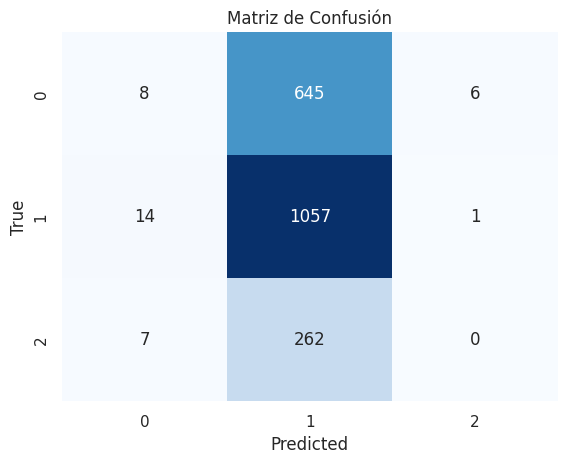

In [79]:
# Visualiza la matriz de confusión de un pliegue de ejemplo (puedes elegir cualquier pliegue)
example_confusion_matrix = confusion_matrices[4]  # Cambia el índice para elegir otro pliegue

# Utiliza seaborn para visualizar la matriz de confusión
sns.heatmap(example_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

In [80]:
meta_resultados = {}
meta_resultados ["Boosting"] = {
    "Accuracy" : mean_accuracy,
    "Precision" : mean_precision,
    "Sensibilidad": mean_recall,
}
y = y1

#2 - Bagging

In [81]:
#Importamos librerias
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Divide los datos en características (X) y variable objetivo (y)
X = df_mejorado
#la variable (y) ya esta definida

X, _, y, _ = train_test_split(X, y, train_size=20000, random_state=42, stratify=y)

# Inicializa el modelo
clf = BaggingClassifier()


# Inicializa una validación cruzada estratificada con k=10
stratified_kfold = StratifiedKFold(n_splits=10)

# Listas para almacenar las métricas de cada pliegue
accuracies = []
precisions = []
recalls = []
confusion_matrices = []


for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrena el clasificador en el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcula las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # weighted precision for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # weighted recall for multiclass

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

     # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)

# Calcula las métricas promedio
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)

print("Métricas promedio:")
print(f"Accuracy: {mean_accuracy}")
print(f"Precisión (weighted): {mean_precision}")
print(f"Sensibilidad (weighted recall): {mean_recall}")

Métricas promedio:
Accuracy: 0.4415
Precisión (weighted): 0.4056700407661277
Sensibilidad (weighted recall): 0.4415


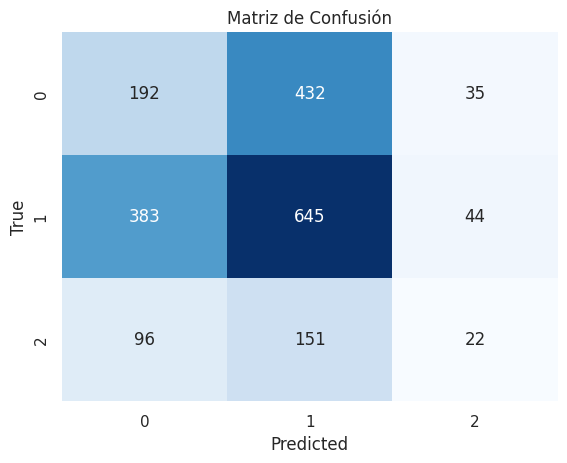

In [82]:
# Visualiza la matriz de confusión de un pliegue de ejemplo (puedes elegir cualquier pliegue)
example_confusion_matrix = confusion_matrices[0]  # Cambia el índice para elegir otro pliegue

# Utiliza seaborn para visualizar la matriz de confusión
sns.heatmap(example_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

In [83]:
meta_resultados ["Bagging"] = {
    "Accuracy" : mean_accuracy,
    "Precision" : mean_precision,
    "Sensibilidad": mean_recall,
}
y = y1

#3 - Stacking

In [84]:
#Importamos librerias
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  # Ejemplo de un clasificador base
from sklearn.svm import SVC  # Ejemplo de otro clasificador base
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Divide los datos en características (X) y variable objetivo (y)
X = df_mejorado
#la variable (y) ya esta definida
X, _, y, _ = train_test_split(X, y, train_size=2000, random_state=42, stratify=y)

estimators = [
   ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
   ('svc', SVC(kernel='linear', C=1, probability=True, random_state=42))]

# Inicializa el modelo
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())


# Inicializa una validación cruzada estratificada con k=10
stratified_kfold = StratifiedKFold(n_splits=10)

# Listas para almacenar las métricas de cada pliegue
accuracies = []
precisions = []
recalls = []
confusion_matrices = []


for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrena el clasificador en el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcula las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # weighted precision for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # weighted recall for multiclass

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

     # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)

# Calcula las métricas promedio
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)

print("Métricas promedio:")
print(f"Accuracy: {mean_accuracy}")
print(f"Precisión (weighted): {mean_precision}")
print(f"Sensibilidad (weighted recall): {mean_recall}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Métricas promedio:
Accuracy: 0.5360000000000001
Precisión (weighted): 0.2873
Sensibilidad (weighted recall): 0.5360000000000001


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


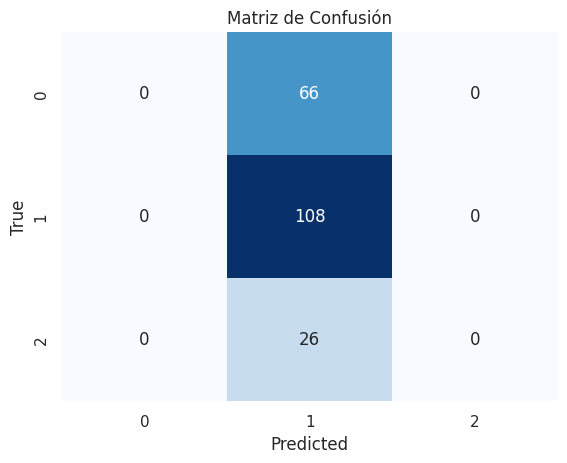

In [85]:
# Visualiza la matriz de confusión de un pliegue de ejemplo (puedes elegir cualquier pliegue)
example_confusion_matrix = confusion_matrices[0]  # Cambia el índice para elegir otro pliegue

# Utiliza seaborn para visualizar la matriz de confusión
sns.heatmap(example_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()


In [86]:
meta_resultados ["Stacking"] = {
    "Accuracy" : mean_accuracy,
    "Precision" : mean_precision,
    "Sensibilidad": mean_recall,
}


In [87]:
y = y1

#4 - Adaboost

In [88]:
#Importamos librerias
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# Divide los datos en características (X) y variable objetivo (y)
X = df_mejorado
#la variable (y) ya esta definida
X, _, y, _ = train_test_split(X, y, train_size=20000, random_state=42, stratify=y)

# Definir un clasificador base (por ejemplo, Decision Tree Classifier)
base_classifier = DecisionTreeClassifier(max_depth=1)  # Clasificador débil


# Inicializa el modelo
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)


# Inicializa una validación cruzada estratificada con k=10
stratified_kfold = StratifiedKFold(n_splits=10)

# Listas para almacenar las métricas de cada pliegue
accuracies = []
precisions = []
recalls = []
confusion_matrices = []


for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrena el clasificador en el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcula las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # weighted precision for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # weighted recall for multiclass

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

     # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)

# Calcula las métricas promedio
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)

print("Métricas promedio:")
print(f"Accuracy: {mean_accuracy}")
print(f"Precisión (weighted): {mean_precision}")
print(f"Sensibilidad (weighted recall): {mean_recall}")

Métricas promedio:
Accuracy: 0.5338
Precisión (weighted): 0.4475678378484601
Sensibilidad (weighted recall): 0.5338


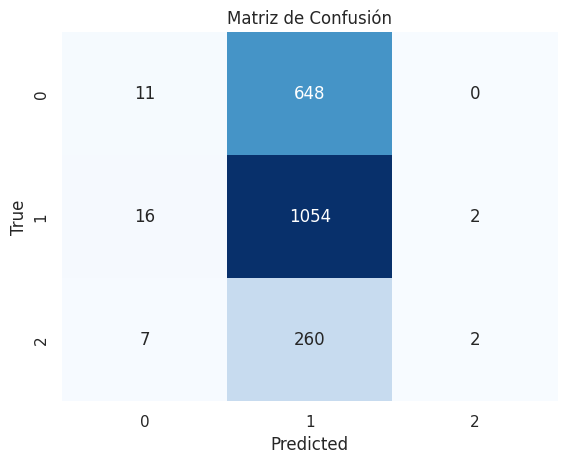

In [89]:
# Visualiza la matriz de confusión de un pliegue de ejemplo (puedes elegir cualquier pliegue)
example_confusion_matrix = confusion_matrices[0]  # Cambia el índice para elegir otro pliegue

# Utiliza seaborn para visualizar la matriz de confusión
sns.heatmap(example_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()


In [91]:
meta_resultados ["Adaboost"] = {
    "Accuracy" : mean_accuracy,
    "Precision" : mean_precision,
    "Sensibilidad": mean_recall,
}

#Resultados

In [96]:
meta_rendimiento = pd.DataFrame(meta_resultados)
meta_rendimiento = meta_rendimiento.T
meta_rendimiento.sort_values(by="Accuracy", ascending=False)

,Accuracy,Precision,Sensibilidad
Stacking,0.53600,0.287300,0.53600
Adaboost,0.53380,0.447568,0.53380
Boosting,0.53295,0.435551,0.53295
Bagging,0.44150,0.405670,0.44150


Como bien podemos observar, Stackingtiene mejor exactitud, sin embargo su precision es la mitad de bueno que lo que es Adaboost, por lo que lo tendremos como ganador entre los ensambles realizados.

Recordando la anterior tabla de comparación:

In [97]:
rendimiento.sort_values(by="Accuracy", ascending=False)

,Accuracy,Precision,Sensibilidad
SVM,0.536000,0.287300,0.536000
LR/PCA,0.535226,0.399036,0.535226
LR,0.534850,0.413500,0.534850
GNB,0.516450,0.432559,0.516450
BNB,0.516450,0.432559,0.516450
Naive Bayes,0.506850,0.438155,0.506850
RF,0.477700,0.400665,0.477700
SGD,0.468200,0.399079,0.468200
Knn,0.433250,0.416545,0.433250
C4.5,0.399300,0.404677,0.399300


Observamos que nuestro vencedor anterior era LogisticRegression con un PCA, a pesar de que mantienen una exactitud similar, pero con una precisión sobresaliente con Adaboost.

Ahora, el segundo objetivo es mejorar ambos modelos.

Hagamos un dataframe con los modelos para su facíl comparación.

In [118]:
rendimiento = rendimiento.T
meta_rendimiento = meta_rendimiento.T
mejores_modelos = pd.DataFrame({"Adaboost": meta_rendimiento["Adaboost"], "LR/PCA": rendimiento["LR/PCA"]})
mejores_modelos.T

,Accuracy,Precision,Sensibilidad
Adaboost,0.533800,0.447568,0.533800
LR/PCA,0.535226,0.399036,0.535226


#Mejoras a LR/PCA

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

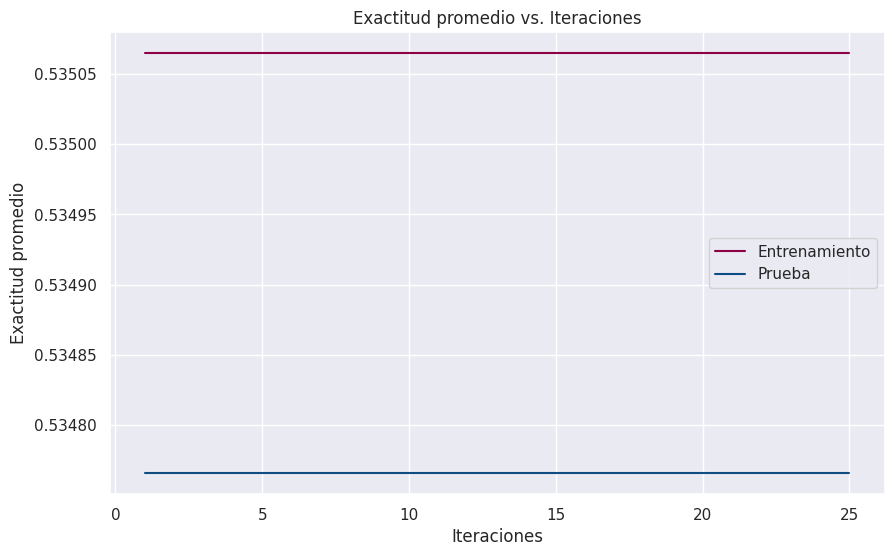

In [169]:
#Importamos las librerias

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Divide los datos en características (X) y variable objetivo (y)
X = df_mejorado

#la variable (y) ya esta definida



#Inicializar
clf = LogisticRegression(max_iter=25, random_state=40, solver='lbfgs')

# Definir el número de splits (k) y la estratificación para la validación cruzada
n_splits = 8  # Puedes ajustar este valor según tus necesidades
stratified_kfold = StratifiedKFold(n_splits=n_splits)

# Listas para almacenar las métricas de la exactitud
train_accuracy = []
test_accuracy = []

# Realizar la validación cruzada estratificada
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Listas para almacenar la exactitud en cada iteración
    train_accuracy_fold = []
    test_accuracy_fold = []

    for i in range(1, clf.max_iter + 1):
        clf.fit(X_train, y_train)
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        train_accuracy_fold.append(accuracy_score(y_train, y_train_pred))
        test_accuracy_fold.append(accuracy_score(y_test, y_test_pred))

    train_accuracy.append(train_accuracy_fold)
    test_accuracy.append(test_accuracy_fold)

# Calcular el promedio de la exactitud en cada iteración para visualización
train_accuracy_mean = [sum([fold[i] for fold in train_accuracy]) / n_splits for i in range(clf.max_iter)]
test_accuracy_mean = [sum([fold[i] for fold in test_accuracy]) / n_splits for i in range(clf.max_iter)]

# Crear un gráfico de la exactitud en función de las iteraciones
plt.figure(figsize=(10, 6))
plt.plot(range(1, clf.max_iter + 1), train_accuracy_mean, label='Entrenamiento')
plt.plot(range(1, clf.max_iter + 1), test_accuracy_mean, label='Prueba')
plt.xlabel('Iteraciones')
plt.ylabel('Exactitud promedio')
plt.legend()
plt.title('Exactitud promedio vs. Iteraciones')
plt.grid(True)
plt.show()


Estuve modificando el "solver" a varios metodos pero no vi ningúna mejora en la exactitud. Tampoco ayudo modificar el valor "c" que es la fuerza de regularización, ni siquiera al ajustar "class_weight='balanced'" pude ver alguna mejora significativa.

Solo apliqué KfoldStratificado y lo iteré 25 veces con los 200,000 ejemplos. Incluso jugue con los folds pero ni eso me arrojo mejores resultados.

#Mejoras Adaboost

In [185]:
y = y1

In [186]:
#Importamos librerias
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# Divide los datos en características (X) y variable objetivo (y)
X = df_mejorado
#la variable (y) ya esta definida

# Definir un clasificador base (por ejemplo, Decision Tree Classifier)
base_classifier = DecisionTreeClassifier(max_depth=2)  # Clasificador débil


# Inicializa el modelo
clf = AdaBoostClassifier(n_estimators=100, random_state=0)



# Inicializa una validación cruzada estratificada con k=10
stratified_kfold = StratifiedKFold(n_splits=10)

# Listas para almacenar las métricas de cada pliegue
accuracies = []
precisions = []
recalls = []
confusion_matrices = []


for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrena el clasificador en el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcula las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # weighted precision for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # weighted recall for multiclass

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

     # Calcula la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)

# Calcula las métricas promedio
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)

print("Métricas promedio:")
print(f"Accuracy: {mean_accuracy}")
print(f"Precisión (weighted): {mean_precision}")
print(f"Sensibilidad (weighted recall): {mean_recall}")

Métricas promedio:
Accuracy: 0.5356058551565477
Precisión (weighted): 0.43607622808206986
Sensibilidad (weighted recall): 0.5356058551565477


In [187]:
mejores_modelos.T

,Accuracy,Precision,Sensibilidad
Adaboost,0.533800,0.447568,0.533800
LR/PCA,0.535226,0.399036,0.535226


Para el ensamble con adaboost, al estar modificando los estimadores, los arboles y la profundidad de los arboles, pero consegui resultados ligeramente diferentes, sin avances significativos.

#Conclusión


A pesar de que los ensambles presentan resultados mejores o similares a los algoritmos de inferencia tradicionales.

Incluso al no tener mejoras para el segundo objetivo se pueden concluir varias cosas respecto a este proyecto.



1.   Al tener particiones de 20,000 instancias bien balanceadas tienen los mismos resultados que aquellos algoritmos que usaron todas las instnacias (200,000). Por lo que es preferible tomar ese 10% por cuestiones de tiempo y recursos.
2.   Malos datos generan malos modelos. Los datos de las 3 clases son bastante similares y es por ello que no importa que tipo de algoritmo uses estos van a tener resultados similares.
3.   Quizas al usar 2 clases (extremos de rangos) puede que se tengan mejores resultados ya que las matrices de confusión nos muestra que el rango del medio es donde clasifica la mayor parte del tiempo a todos los rangos.
4.  Al mismo tiempo, los atributos significativos usados pueden variar para su efectividad, en este caso se estuvo usando 20, pero hacer pruebas con 5, 10, 15, 25 y 30, serian de suma utilidad para mejorar estos modelos.
5.  Finalmente puedo concluir que a pesar de no tener resultados provechosos si que dan otro enfoque el tener tantos algoritmos de inferencia sobre un mismo problema para comprender su complejidad del mismo.
6. Tambien recordar lo tardado y costoso que es entrenar y probar modelos, es importante estar usando particiones significativas relevantes para poder trabajar como ejemplo y despues usar todos los datos cuando se tenga la certeza de la utilidad.



